In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how='outer', on='city')
len(combined_data)
combined_data.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [4]:
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types
combined_data["counter"]= 1 # create a ride counter

city_unique = combined_data.drop_duplicates('city') # Drop duplicates by city
city_unique.dtypes
city_drivers=city_unique.set_index('city',inplace=True)


urban = combined_data.loc[(combined_data["type"] == "Urban")]
suburban = combined_data.loc[(combined_data["type"] == "Suburban")]
rural = combined_data.loc[(combined_data["type"] == "Rural")]

city_urban = urban.groupby('city')
city_suburban = suburban.groupby('city')
city_rural = rural.groupby('city')


rides_urban = city_urban["counter"].sum()
avgfare_urban = city_urban["fare"].mean()

rides_suburban = city_suburban["counter"].sum()
avgfare_suburban = city_suburban["fare"].mean()

rides_rural = city_rural["counter"].sum()
avgfare_rural = city_rural["fare"].mean()

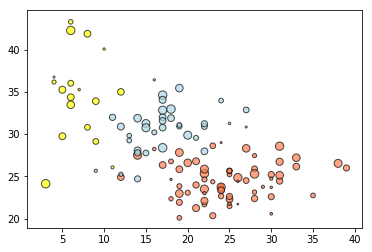

In [6]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()

plt.scatter(rides_urban, avgfare_urban, marker="o", facecolors="coral", edgecolors="black", 
            s=city_unique["driver_count"], alpha=0.7, label="Urban")
plt.scatter(rides_suburban, avgfare_suburban, marker="o", facecolors="lightblue", edgecolors="black", 
            s=city_unique["driver_count"], alpha=0.7, label="Suburban")
plt.scatter(rides_rural, avgfare_rural, marker="o", facecolors="yellow", edgecolors="black", 
            s=city_unique["driver_count"], alpha=0.7, label="Rural")

Text(0, 0.5, 'Average Fare ($)')

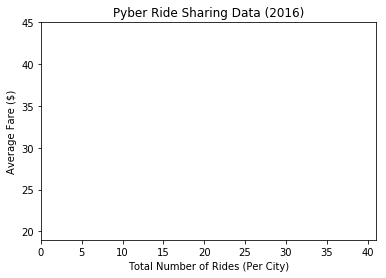

In [7]:
# Incorporate the other graph properties
plt.xlim(0, 41)
plt.ylim(19, 45)
ax.grid(linestyle='-', linewidth='0.5',)
plt.title('Pyber Ride Sharing Data (2016)')

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

No handles with labels found to put in legend.


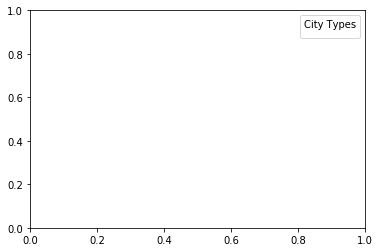

In [8]:
# Create a legend
plt.legend(loc="best", fancybox=True, title="City Types")

In [9]:
# Incorporate a text label regarding circle size
plt.text(42,35, 'Note:\nCircle size correlates with driver count per City')

Text(42, 35, 'Note:\nCircle size correlates with driver count per City')

In [10]:
# Save Figure
plt.savefig('PyberScatterPlot.png')

<Figure size 432x288 with 0 Axes>

In [11]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


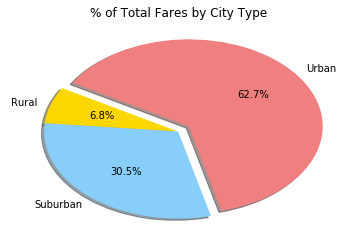

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


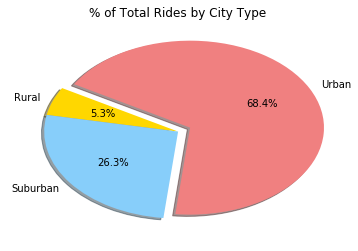

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


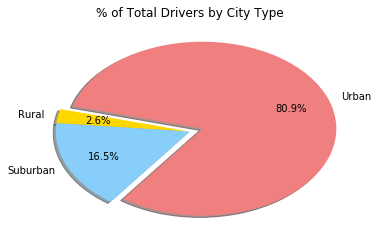

In [6]:
# Show Figure
plt.show()